# Manifold learning with Feature-type distributed clustering workflow is more informative compared to UMAP for tabular clinical datasets

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import math
import umap.umap_ as umap
%config InlineBackend.figure_format = 'svg'

In [2]:
from cluster_val import *

## Importing data

In [3]:
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data_with_target=pd.read_csv('preprocessed_migraine_data.csv')

In [4]:
np.random.seed(42)
data=data_with_target.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(400)]

data.set_index(pd.Series(i), inplace=True)

In [5]:
data.drop(['Unnamed: 0','Type'],axis=1,inplace=True)

## UMAP on original data

In [6]:
from fdc.fdc import feature_clustering

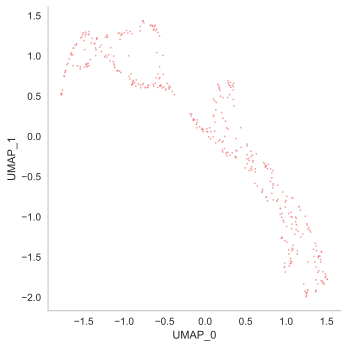

In [7]:
umap_emb=feature_clustering(15,0.1,'euclidean',data,True)

## ANOVA test, Silhouette_score  and Dunn index for umap clusters extracted using K-means clustering

In [8]:
from fdc.clustering import Clustering

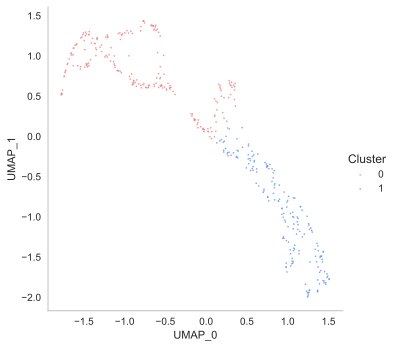

In [9]:
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(2)

In [10]:
cont_list=['Age']

ord_list=['Duration','Frequency','Intensity','Visual','Nausea', 'Vomit']

nom_list=['Location','Character','Dysphasia', 'Vertigo', 'Tinnitus','Sensory','Phonophobia','Photophobia', 'Hypoacusis', 'Diplopia', 'Defect','Conscience', 'Paresthesia', 'DPF']

In [11]:


### ANOVA TEST

data['Cluster']=umap_cluster_list
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  28.57 %
percentage of ordinal features having p-value less than 0.05:  50.0 %
percentage of  nominal features having p-value less than 0.05:  14.285714285714285 %
percentage of continous features having p-value less than 0.05:  100.0 %


In [12]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [13]:
 silhouette_score(umap_emb, umap_cluster_list, metric='euclidean')


0.6538103205620339

## Visualizing Silhouette score (you can also choose the number of clusters based on score)

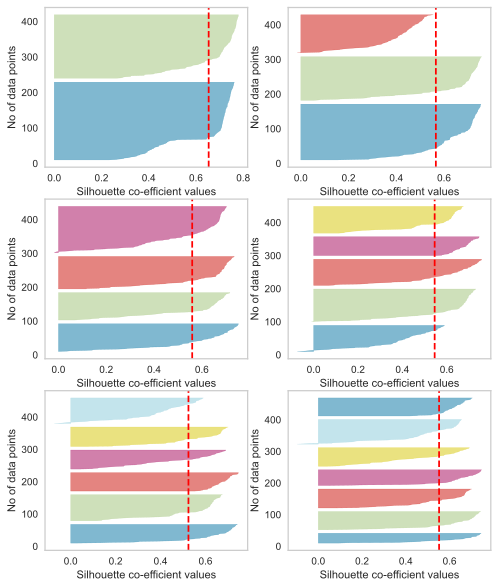

In [14]:
Silhouette_visual(umap_emb)

## Elbow plot for umap_embedding

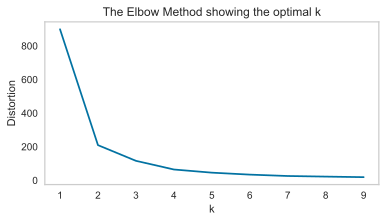

In [15]:
elbow_plot(umap_emb)

In [16]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list))

0.009496802555391088

## ANOVA test, Silhouette_score  and Dunn index for umap clusters extracted using Agglomerative clustering

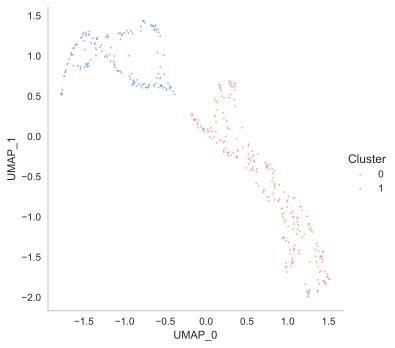

In [17]:
umap_cluster_list_agglo,umap_cluster_counts_agglo=umap_clustering.Agglomerative(2,'euclidean','ward')

In [18]:

### ANOVA TEST


data['Cluster']=umap_cluster_list_agglo
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  14.29 %
percentage of ordinal features having p-value less than 0.05:  16.666666666666664 %
percentage of  nominal features having p-value less than 0.05:  7.142857142857142 %
percentage of continous features having p-value less than 0.05:  100.0 %


In [19]:
silhouette_score(umap_emb, umap_cluster_list_agglo, metric='euclidean')

0.6438376553522397

In [20]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_agglo))

0.10897795465282636

## ANOVA test, Silhouette_score  and Dunn index for umap clusters extracted using DBSCAN clustering

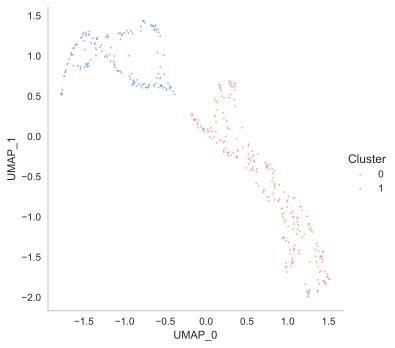

In [21]:
umap_cluster_list_dbscan,umap_cluster_counts_dbscan=umap_clustering.DBSCAN(0.5,20)

In [22]:


### ANOVA TEST

data['Cluster']=umap_cluster_list_dbscan
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  14.29 %
percentage of ordinal features having p-value less than 0.05:  16.666666666666664 %
percentage of  nominal features having p-value less than 0.05:  7.142857142857142 %
percentage of continous features having p-value less than 0.05:  100.0 %


In [23]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(umap_cluster_list_dbscan)!=-1)
umap_emb= umap_emb.iloc[non_noise_indices]
#FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
umap_cluster_list_dbscan= np.array(umap_cluster_list_dbscan)[non_noise_indices]


In [24]:
silhouette_score(umap_emb, umap_cluster_list_dbscan, metric='euclidean')

0.6438376553522397

In [25]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_dbscan))

0.10897795465282636

## Dividing features
- cont_list=continueous features
- ord_list=ordinal features
- nom_list=nominal features



In [26]:
cont_list=['Age']

ord_list=['Duration','Frequency','Intensity','Visual','Nausea', 'Vomit']
nom_list=['Location','Character','Dysphasia', 'Vertigo', 'Tinnitus','Sensory','Phonophobia','Photophobia', 'Hypoacusis', 'Diplopia', 'Defect','Conscience', 'Paresthesia', 'DPF']

In [27]:
len(ord_list)

6

In [28]:
len(nom_list)

14

In [29]:
len(cont_list)

1

## FDC on original data

In [30]:
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified

FDC.normalize (init): 0.00000 / 0.000s
FDC.normalize (clustering CONT): 5.45312 / 5.453s
FDC.normalize (clustering ORD): 5.78125 / 11.234s
FDC.normalize (clustering NOM): 7.70312 / 18.938s
FDC.normalize (concat): 0.00000 / 18.938s
FDC.normalize (umap 5 -> 2): 3.15625 / 22.094s
FDC.normalize (array -> DataFrame): 0.00000 / 22.094s


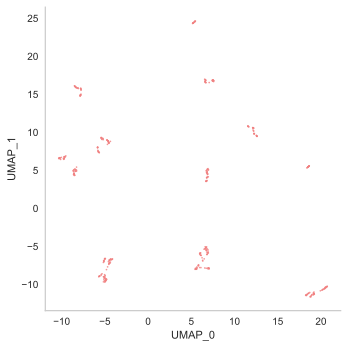

FDC.normalize (plotting): 2.01562 / 24.109s
FDC.normalize (array -> DataFrame): 0.00000 / 24.109s
FDC.normalize (total): 0.00000 / 24.109s


In [31]:

fdc = FDC(clustering_cont=Clustering('euclidean',15,0.1,max_components=1)
          , clustering_ord=Clustering(modified_can,15,0.1)
          , clustering_nom=Clustering('hamming',15,0.1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,n_neighbors=15, min_dist=0.1,cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

## ANOVA test, Silhouette_score  and Dunn index for FDC clusters extracted using K-means clustering

In [32]:
from fdc.clustering import Clustering

In [33]:
FDC_emb_low.rename(columns={"UMAP_0": "FDC_0", "UMAP_1": "FDC_1"},inplace=True)

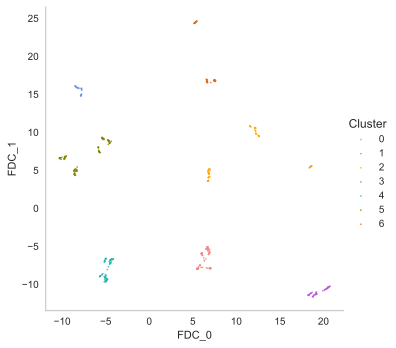

In [34]:
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(7)

In [35]:


### ANOVA TEST

data['Cluster']=cluster_list
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3,c_4,c_5,c_6)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  52.38 %
percentage of ordinal features having p-value less than 0.05:  50.0 %
percentage of  nominal features having p-value less than 0.05:  50.0 %
percentage of continous features having p-value less than 0.05:  100.0 %


In [36]:
silhouette_score(FDC_emb_low, cluster_list, metric='euclidean')


0.7612078653386828

## Visualizing Shilhouette score for low_dim fdc embedding

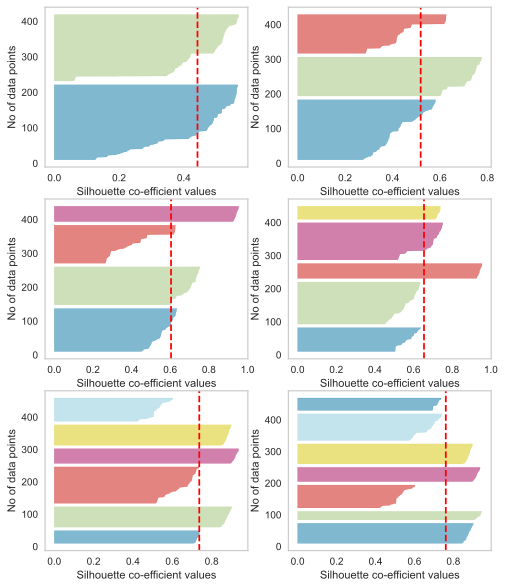

In [37]:
Silhouette_visual(FDC_emb_low)

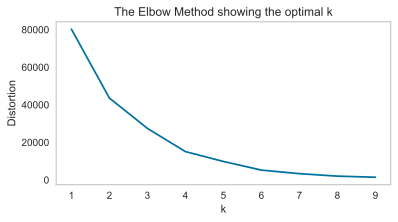

In [38]:
elbow_plot(FDC_emb_low)

In [39]:
dunn_index(cluster_wise_df(FDC_emb_low,cluster_list))

0.9469432715496301

## ANOVA test, Silhouette_score  and Dunn index for FDC clusters extracted using Agglomerative clustering

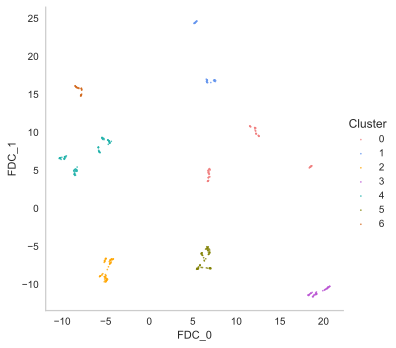

In [40]:
cluster_list_agglo,cluster_counts_agglo=clustering.Agglomerative(7,'euclidean','ward')

In [41]:

### ANOVA TEST

data['Cluster']=cluster_list
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3,c_4,c_5,c_6)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  52.38 %
percentage of ordinal features having p-value less than 0.05:  50.0 %
percentage of  nominal features having p-value less than 0.05:  50.0 %
percentage of continous features having p-value less than 0.05:  100.0 %


In [42]:
silhouette_score(FDC_emb_low, cluster_list_agglo, metric='euclidean')

0.7545526755512764

In [43]:
dunn_index(cluster_wise_df(FDC_emb_low,cluster_list_agglo))

0.5810688749310691

## ANOVA test, Silhouette_score  and Dunn index for FDC clusters extracted using DBSCAN clustering

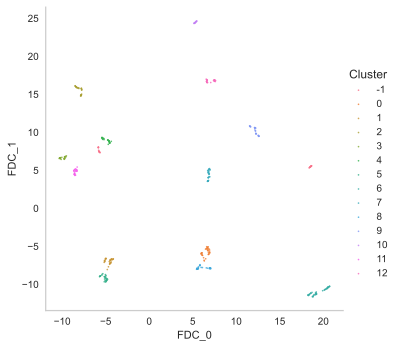

In [44]:
cluster_list_dbscan,cluster_counts_dbscan=clustering.DBSCAN(0.9,15)

In [45]:

### ANOVA TEST

data['Cluster']=cluster_list_dbscan
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))-1):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3,c_4,c_5,c_7,c_8,c_9,c_10,c_11,c_12)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  61.9 %
percentage of ordinal features having p-value less than 0.05:  50.0 %
percentage of  nominal features having p-value less than 0.05:  64.28571428571429 %
percentage of continous features having p-value less than 0.05:  100.0 %


In [46]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(cluster_list)!=-1)
FDC_emb_high= FDC_emb_high.iloc[non_noise_indices]
FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
cluster_list= np.array(cluster_list)[non_noise_indices]


In [47]:
silhouette_score(FDC_emb_low, cluster_list_dbscan, metric='euclidean')

0.8302098076459228

In [48]:
dunn_index(cluster_wise_df(FDC_emb_low,cluster_list_dbscan))

1.7069420801194395